In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/Admission_Prediction_Data.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# We dont need Serial No. column
df = df.drop(['Serial No.'], axis=1)

In [35]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.shape

(500, 8)

In [37]:
df.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
# Checking number of null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

As we can see there are 0 null values, therefore there is no need for imputation

In [6]:
# these are the independent features
target_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research


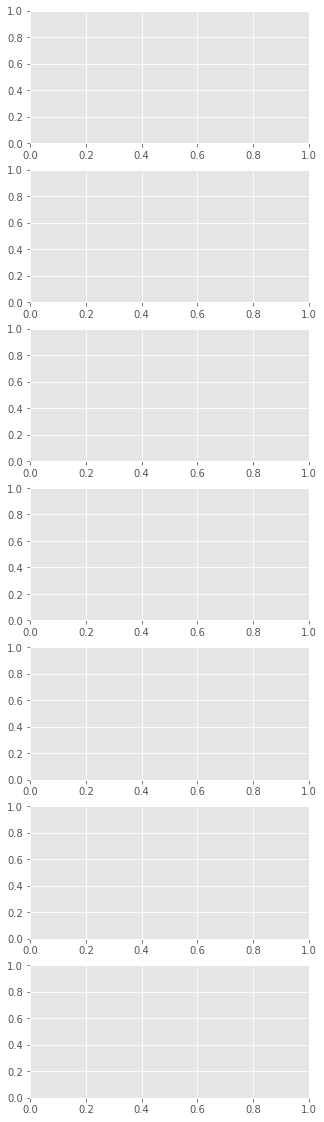

In [7]:
fig, axis = plt.subplots(7, 1, figsize=(5,20))

for axis_number, feature in enumerate(target_features):
    print(feature)
    
    


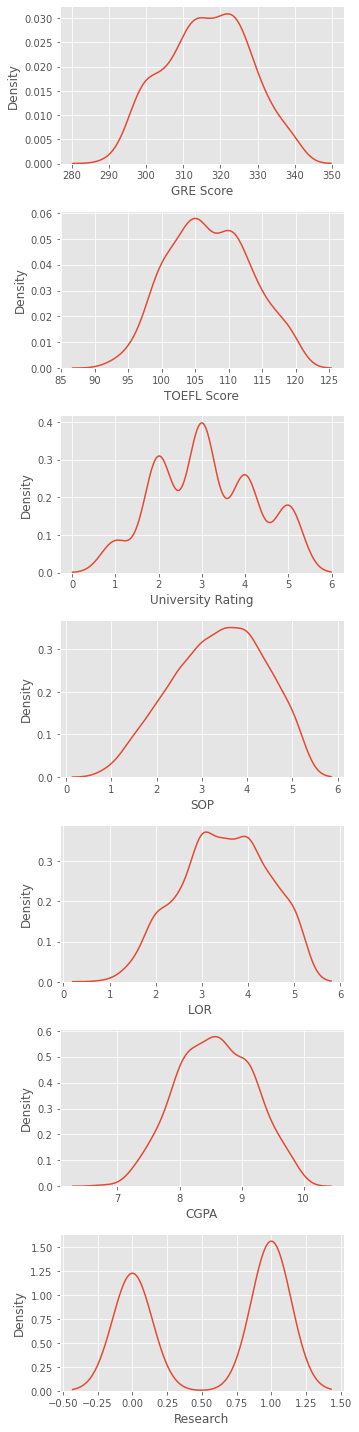

In [8]:
fig, axis = plt.subplots(7, 1, figsize=(5,20))

for axis_number, feature in enumerate(target_features):
    sns.kdeplot(ax=axis[axis_number], x=feature, data=df);
    
fig.tight_layout();

From above Graphs we see that all the independent features are Normally distributed.

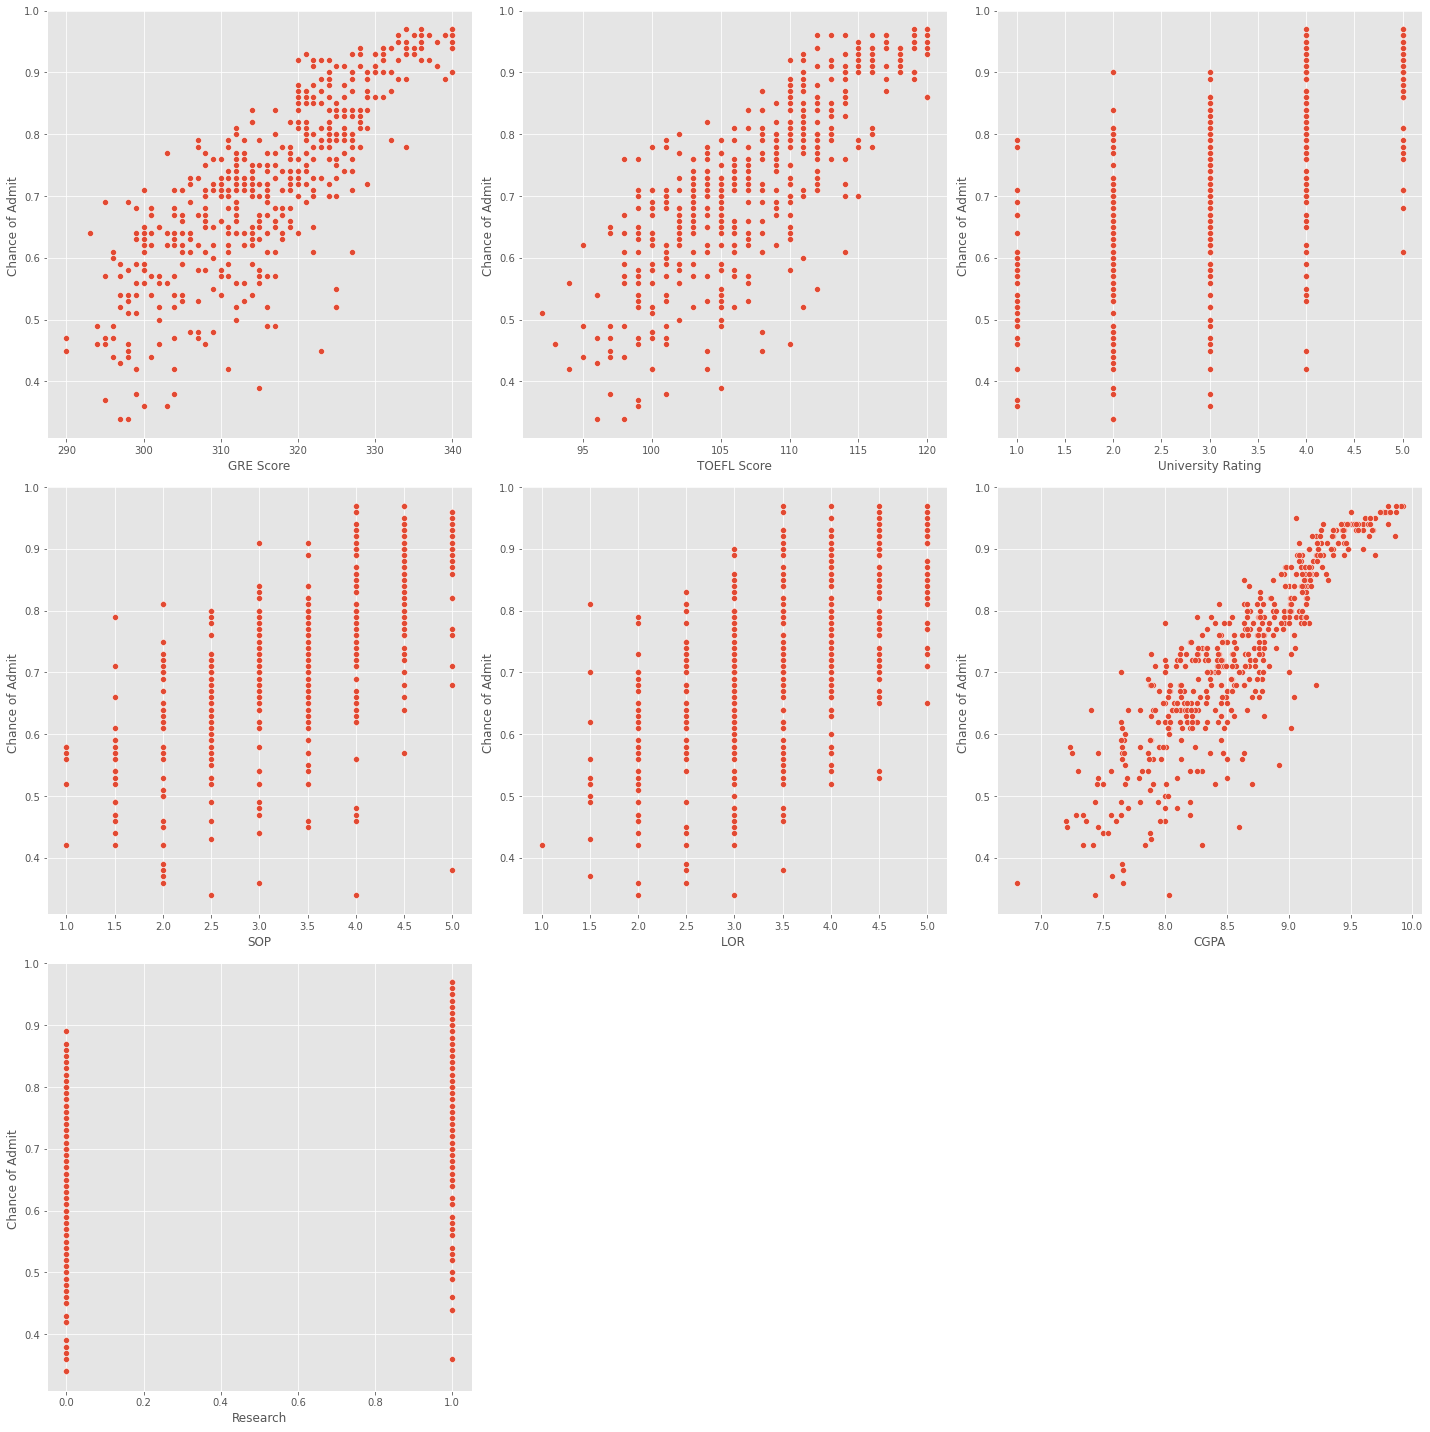

In [9]:
# Now looking 
plt.figure(figsize=(20,20))

for plot_number, feature in enumerate(target_features):
    plt.subplot(3, 3, plot_number + 1)
    sns.scatterplot(x=feature, y='Chance of Admit ', data=df)
    
plt.tight_layout()

##### Now lets make the independent and the dependent feature

In [10]:
X = df[target_features]
y = df['Chance of Admit ']

In [13]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

##### Now lets do some Preprocessing on our data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [14]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


As we can see the data has been Standardized.

##### Now we will split the data into test and train sets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Looking at the shape of the data
print(f"Training set: {X_train.shape} and {y_train.shape}")
print(f"Test set: {X_test.shape} and {y_test.shape}")

Training set: (400, 7) and (400,)
Test set: (100, 7) and (100,)


As we see from above output the data has been split into training and test data

##### Now lets build a simple Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
model = LinearRegression()

In [25]:
# training our model
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# lets predict the values
y_pred = model.predict(X_test)

In [27]:
# Now lets see how the model performed
print(r2_score(y_test, y_pred))

0.7664048993199384


Our model has an accuracy of ~76.6% 

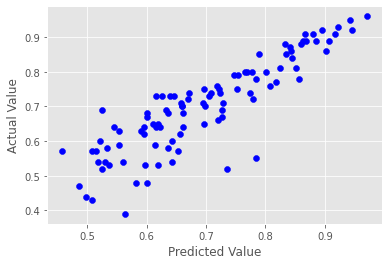

In [28]:
plt.figure()
plt.scatter(x=y_pred, y=y_test, c='blue')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

##### Now we will save our mdodel.

In [29]:
# saving our model with pickle
import pickle

In [30]:
file_name = 'admission_prediction_model.pkl'
pickle.dump(model, open(file_name, 'wb'))